<a href="https://colab.research.google.com/github/cboyda/MachineLearning/blob/main/PA4_Team1_W23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Assignment #4: Decision Tree**

Team member names:

*  Brett Adams
*  Cailenys Leslie
*  Clinton Boyda 
*  Tanvir Hossain
*  Ram Dershan

Dataset: 
[New York City Airbnb Open Data](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from  sklearn import neighbors
import plotly.graph_objects as go
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Connect to Dataset

#original filename = "https://raw.githubusercontent.com/cboyda/MachineLearning/main/AB_NYC_2019.csv"
#df = pd.read_csv(filename)

# load both data sets in
original = "https://raw.githubusercontent.com/cboyda/MachineLearning/main/AB_NYC_2019.csv"
df_original = pd.read_csv(original)
additional = "https://raw.githubusercontent.com/cboyda/MachineLearning/main/full_nyc_dataset_cleaned_table-1.csv"
df_additional = pd.read_csv(additional)

In [ ]:
# Merge the two datasets with an inner join, validate that no duplicate id values exist for a one to one join
df = pd.merge(df_original, df_additional, how = "inner", on = "id", validate="one_to_one", suffixes=("_original","_additional"))
df.shape

(16005, 22)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type_original', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'property_type', 'room_type_additional',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds'],
      dtype='object')

In [ ]:
df

id                                               name    host_id  \
0          2595                              Skylit Midtown Castle       2845   
1          5121                                    BlissArtsSpace!       7356   
2          5178                   Large Furnished Room Near B'way        8967   
3          5203                 Cozy Clean Guest Room - Family Apt       7490   
4          5803     Lovely Room 1, Garden, Best Area, Legal rental       9744   
...         ...                                                ...        ...   
16000  36457832      ❥NYC Apt: 4min/subway, 25m/city, 20m/LGA,JFK❥   63272360   
16001  36471896    Private Bedroom & PRIVATE BATHROOM in Manhattan   23548340   
16002  36477307                                  Brooklyn paradise  241945355   
16003  36481615                   Peaceful space in Greenpoint, BK  274298453   
16004  36487245  Trendy duplex in the very heart of Hell's Kitchen   68119814   

            host_name neighbourhood_group       neighbourhood  latitude  \
0            Jennifer           Manhattan             Midtown  40.75362   
1               Garon            Brooklyn  Bedford-Stuyvesant  40.68688   
2            Shunichi           Manhattan      Hell's Kitchen  40.76489   
3           MaryEllen           Manhattan     Upper West Side  40.80178   
4              Laurie            Brooklyn         South Slope  40.66829   
...               ...                 ...                 ...       ...   
16000  Annie Lawrence              Queens           Woodhaven  40.69482   
16001           Sarah           Manhattan     Upper East Side  40.77192   
16002  Clement & Rose            Brooklyn           Flatlands  40.63116   
16003          Adrien            Brooklyn          Greenpoint  40.72585   
16004      Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude room_type_original  price  ...  last_review  \
0      -73.98377    Entire home/apt    225  ...   2019-05-21   
1      -73.95596       Private room     60  ...   2017-10-05   
2      -73.98493       Private room     79  ...   2019-06-24   
3      -73.96723       Private room     79  ...   2017-07-21   
4      -73.98779       Private room     89  ...   2019-06-24   
...          ...                ...    ...  ...          ...   
16000  -73.86618    Entire home/apt     85  ...          NaN   
16001  -73.95369       Private room     95  ...          NaN   
16002  -73.92616    Entire home/apt    170  ...          NaN   
16003  -73.94001       Private room     54  ...          NaN   
16004  -73.98933       Private room     90  ...          NaN   

       reviews_per_month calculated_host_listings_count  availability_365  \
0                   0.38                              2               355   
1                   0.40                              1                 0   
2                   3.47                              1               220   
3                   0.99                              1                 0   
4                   1.34                              3               314   
...                  ...                            ...               ...   
16000                NaN                              6               300   
16001                NaN                              1                 2   
16002                NaN                              2               363   
16003                NaN                              1                15   
16004                NaN                              1                23   

                     property_type  room_type_additional accommodates  \
0               Entire rental unit       Entire home/apt            1   
1      Private room in rental unit          Private room            2   
2      Private room in rental unit          Private room            2   
3      Private room in rental unit          Private room            1   
4        Private room in townhouse          Private room            2   
...    

# **Data Cleaning**

In [ ]:
# check value counts for property_type
df['property_type'].value_counts()

Entire rental unit                    6975
Private room in rental unit           5153
Private room in home                   844
Entire home                            513
Entire condo                           418
Private room in townhouse              352
Entire loft                            326
Entire townhouse                       297
Private room in condo                  180
Shared room in rental unit             178
Private room in loft                   149
Entire guest suite                     133
Entire serviced apartment               98
Room in boutique hotel                  68
Room in hotel                           56
Private room in guest suite             37
Entire place                            33
Room in serviced apartment              24
Shared room in loft                     19
Entire guesthouse                       19
Private room                            18
Private room in resort                  17
Private room in bed and breakfast       14
Shared room

There are property types that we do not want to consider in our analysis (Boats, Caves and Villa's) so we will remove these examples.

In [ ]:
# Check shape before dropping examples
df.shape

(16005, 22)

In [ ]:
df = df.drop(df[(df['property_type'] == 'Cave') | (df['property_type'] == 'Boat') | 
                (df['property_type'] == 'Floor') | (df['property_type'] == 'Private room in farm stay') |
                (df['property_type'] == 'Entire villa') | (df['property_type'] == 'Private room in houseboat') |
                (df['property_type'] == 'Private room in villa') | (df['property_type'] == 'Private room in tent') |
                (df['property_type'] == 'Houseboat')].index)

In [ ]:
# Check shape after dropping examples
df.shape

(15986, 22)

In [ ]:
# assess new value counts for property_type
df['property_type'].value_counts()

Entire rental unit                    6975
Private room in rental unit           5153
Private room in home                   844
Entire home                            513
Entire condo                           418
Private room in townhouse              352
Entire loft                            326
Entire townhouse                       297
Private room in condo                  180
Shared room in rental unit             178
Private room in loft                   149
Entire guest suite                     133
Entire serviced apartment               98
Room in boutique hotel                  68
Room in hotel                           56
Private room in guest suite             37
Entire place                            33
Room in serviced apartment              24
Entire guesthouse                       19
Shared room in loft                     19
Private room                            18
Private room in resort                  17
Private room in bed and breakfast       14
Shared room

In [ ]:
# extract the numerical values from the bathroom_text column for consideration 
df['bathrooms_text'].mask(df['bathrooms_text'] == 'Half-bath', 0.5, inplace=True)
df['bathrooms_text'].mask(df['bathrooms_text'] == 'Shared half-bath', 0.5, inplace=True)
df['bathrooms_text'].mask(df['bathrooms_text'] == 'Private half-bath', 0.5, inplace=True)
df['bathrooms'] = df['bathrooms_text'].str.extract(r'\b([\d.]+)\b')

In [ ]:
# let's look closer at the property_type values, perhaps this can be simplified
print(df['property_type'].unique())
print("Number of property_type unique values:",df['property_type'].nunique())

['Entire rental unit' 'Private room in rental unit'
 'Private room in townhouse' 'Entire guest suite' 'Entire loft'
 'Private room in home' 'Entire condo' 'Private room in condo'
 'Private room in loft' 'Entire home' 'Entire townhouse'
 'Private room in bed and breakfast' 'Entire guesthouse'
 'Private room in guest suite' 'Room in boutique hotel'
 'Shared room in rental unit' 'Shared room in home' 'Private room'
 'Entire place' 'Entire serviced apartment' 'Private room in guesthouse'
 'Room in serviced apartment' 'Entire cottage' 'Shared room in loft'
 'Private room in serviced apartment' 'Entire bungalow' 'Room in hotel'
 'Shared room in townhouse' 'Private room in hostel'
 'Private room in bungalow' 'Shared room in condo'
 'Private room in resort' 'Shared room in floor' 'Private room in floor'
 'Tiny home' 'Entire home/apt' 'Shared room in guest suite'
 'Room in resort' 'Room in aparthotel' 'Shared room in guesthouse'
 'Room in bed and breakfast']
Number of property_type unique value

In [ ]:
df['property_type'] = df.property_type.str.replace(r'(^.*Private room.*$)', 'Private Room')
#df.property_type.replace(['Private room in rental unit', 'female'], [1, 0], inplace=True)
#replace_property_values = {'Small' : 1, 'Medium' : 2, 'High' : 3 }
#replace_property_values = df.loc[df['property_type'].str.contains('Private room', case=False), 'property_type'] = 'Private Room'

In [ ]:
df['property_type'] = df.property_type.str.replace(r'(^.*Entire.*$)', 'Entire Unit')

In [ ]:
df['property_type'] = df.property_type.str.replace(r'(^.*Shared room.*$)', 'Shared Room')

In [ ]:
df['property_type'] = df.property_type.str.replace(r'(^.*Room in.*$)', 'Room In')

In [ ]:
df['property_type'].value_counts()

Entire Unit     8826
Private Room    6780
Shared Room      220
Room In          154
Tiny home          6
Name: property_type, dtype: int64

In [ ]:
print(df['property_type'].unique())
print("Number of property_type unique values:",df['property_type'].nunique())

['Entire Unit' 'Private Room' 'Room In' 'Shared Room' 'Tiny home']
Number of property_type unique values: 5


In [ ]:
# Convert bathroom to float type
df['bathrooms'] = df['bathrooms'].astype(float)

In [ ]:
# drop bathroom_text, beds, and duplicated room_type column
df.drop(['bathrooms_text', 'room_type_additional', 'beds'], axis = 1, inplace = True)

In [ ]:
# drop suffix from room_type_original
df = df.rename(columns = {'room_type_original' : 'room_type'})

In [ ]:
df['room_type'].value_counts()

Entire home/apt    8803
Private room       6963
Shared room         220
Name: room_type, dtype: int64

In [ ]:
# check for null values
df.isnull().sum()

id                                   0
name                                11
host_id                              0
host_name                           10
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3010
reviews_per_month                 3010
calculated_host_listings_count       0
availability_365                     0
property_type                        0
accommodates                         0
bedrooms                          1562
bathrooms                           52
dtype: int64

For bedrooms and bathrooms with null values, fill with zero as properties can have no bedrooms or bathrooms

In [ ]:
df[['bedrooms', 'bathrooms']] = df[['bedrooms', 'bathrooms']].fillna(value=0)

In [ ]:
# Check null values again to confirm
df.isnull().sum()

id                                   0
name                                11
host_id                              0
host_name                           10
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3010
reviews_per_month                 3010
calculated_host_listings_count       0
availability_365                     0
property_type                        0
accommodates                         0
bedrooms                             0
bathrooms                            0
dtype: int64

All other columns with null values are not important for this analysis as these columns will be dropped.

In [ ]:
df.duplicated().any()

False

In [ ]:
# any duplicates in the data?
duplicate_rows = df.duplicated()
df_no_dups = df[~duplicate_rows]
print ("There are " + str(duplicate_rows.sum()) + " duplicate rows in our dataframe that need to be considered.")

There are 0 duplicate rows in our dataframe that need to be considered.


In [ ]:
df.shape

(15986, 20)

In [ ]:
# really only needed if duplicate_rows > 0
df = df_no_dups
df.reset_index(inplace=True)

In [ ]:
df.shape

(15986, 21)

In [ ]:
df_no_dups

index        id                                               name  \
0          0      2595                              Skylit Midtown Castle   
1          1      5121                                    BlissArtsSpace!   
2          2      5178                   Large Furnished Room Near B'way    
3          3      5203                 Cozy Clean Guest Room - Family Apt   
4          4      5803     Lovely Room 1, Garden, Best Area, Legal rental   
...      ...       ...                                                ...   
15981  16000  36457832      ❥NYC Apt: 4min/subway, 25m/city, 20m/LGA,JFK❥   
15982  16001  36471896    Private Bedroom & PRIVATE BATHROOM in Manhattan   
15983  16002  36477307                                  Brooklyn paradise   
15984  16003  36481615                   Peaceful space in Greenpoint, BK   
15985  16004  36487245  Trendy duplex in the very heart of Hell's Kitchen   

         host_id       host_name neighbourhood_group       neighbourhood  \
0           2845        Jennifer           Manhattan             Midtown   
1           7356           Garon            Brooklyn  Bedford-Stuyvesant   
2           8967        Shunichi           Manhattan      Hell's Kitchen   
3           7490       MaryEllen           Manhattan     Upper West Side   
4           9744          Laurie            Brooklyn         South Slope   
...          ...             ...                 ...                 ...   
15981   63272360  Annie Lawrence              Queens           Woodhaven   
15982   23548340           Sarah           Manhattan     Upper East Side   
15983  241945355  Clement & Rose            Brooklyn           Flatlands   
15984  274298453          Adrien            Brooklyn          Greenpoint   
15985   68119814      Christophe           Manhattan      Hell's Kitchen   

       latitude  longitude        room_type  ...  minimum_nights  \
0      40.75362  -73.98377  Entire home/apt  ...               1   
1      40.68688  -73.95596     Private room  ...              45   
2      40.76489  -73.98493     Private room  ...               2   
3      40.80178  -73.96723     Private room  ...               2   
4      40.66829  -73.98779     Private room  ...               4   
...         ...        ...              ...  ...             ...   
15981  40.69482  -73.86618  Entire home/apt  ...               3   
15982  40.77192  -73.95369     Private room  ...               1   
15983  40.63116  -73.92616  Entire home/apt  ...               1   
15984  40.72585  -73.94001     Private room  ...               6   
15985  40.76404  -73.98933     Private room  ...               7   

       number_of_reviews  last_review reviews_per_month  \
0                     45   2019-05-21              0.38   
1                     49   2017-10-05              0.40   
2                    430   2019-06-24              3.47   
3                    118   2017-07-21              0.99   
4                    167   2019-06-24              1.34   
...                  ...          ...               ...   
15981                  0          NaN               NaN   
15982                  0          NaN               NaN   
15983                  0          NaN               NaN   
15984                  0          NaN               NaN   
15985                  0          NaN               NaN   

       calculated_host_listings_count  availability_365  property_type  \
0                                   2               355    Entire Unit   
1                                   1                 0   Private Room   
2                                   1               220   Private Room   
3                                   1                 0   Private Room   
4                                   3               314   Private Room   
...                               ...               ...            ...   
15981                               6               300    Entire Unit   
15982                               1              

# **Feature Scaling**


In [ ]:
df.columns

Index(['index', 'id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'property_type', 'accommodates', 'bedrooms',
       'bathrooms'],
      dtype='object')

In [ ]:
# drop all columns not necessary
# over simplifying for our first iteration

df.drop(['index','neighbourhood','name','host_name','number_of_reviews','last_review','reviews_per_month',
         'calculated_host_listings_count','id','host_id','latitude','longitude'], axis=1, inplace = True)
# df.drop('a', inplace=True, axis=1)

In [ ]:
#define clean as duplicate
df_clean = df.copy()

In [ ]:
df_clean

neighbourhood_group        room_type  price  minimum_nights  \
0               Manhattan  Entire home/apt    225               1   
1                Brooklyn     Private room     60              45   
2               Manhattan     Private room     79               2   
3               Manhattan     Private room     79               2   
4                Brooklyn     Private room     89               4   
...                   ...              ...    ...             ...   
15981              Queens  Entire home/apt     85               3   
15982           Manhattan     Private room     95               1   
15983            Brooklyn  Entire home/apt    170               1   
15984            Brooklyn     Private room     54               6   
15985           Manhattan     Private room     90               7   

       availability_365 property_type  accommodates  bedrooms  bathrooms  
0                   355   Entire Unit             1       0.0        1.0  
1                     0  Private Room             2       1.0        0.0  
2                   220  Private Room             2       1.0        1.0  
3                     0  Private Room             1       1.0        1.0  
4                   314  Private Room             2       1.0        1.5  
...                 ...           ...           ...       ...        ...  
15981               300   Entire Unit             2       1.0        1.0  
15982                 2  Private Room             2       1.0        1.0  
15983               363   Entire Unit             6       2.0        1.0  
15984                15  Private Room             2       1.0        1.0  
15985                23  Private Room             2       1.0        2.0  

[15986 rows x 9 columns]

In [ ]:
df_clean.shape

(15986, 9)

In [ ]:
zero_availability = df_clean.loc[df_clean.availability_365 == 0, 'availability_365'].index
# zero availability means unit is NOT available so best drop from out model
df_clean.drop(zero_availability,axis=0,inplace=True)

DROP units that are simply not able to be rented. This includes availability = 0

In [ ]:
df_clean.shape

(8624, 9)

In [ ]:
# dropping availability_365 feature at this stage since it was a filter not a feature
df_clean.drop(['availability_365'], axis=1, inplace = True)

In [ ]:
df_clean.shape

(8624, 8)

In [ ]:
numeric_data = df_clean.select_dtypes(include=[np.number])
categorical_data = df_clean.select_dtypes(exclude=[np.number])

In [ ]:
df_clean['neighbourhood_group'] = df_clean['neighbourhood_group'].astype('category')

In [ ]:
numeric_data

price  minimum_nights  accommodates  bedrooms  bathrooms
0        225               1             1       0.0        1.0
2         79               2             2       1.0        1.0
4         89               4             2       1.0        1.5
5        140               2             3       0.0        1.0
6        215               2             4       1.0        1.0
...      ...             ...           ...       ...        ...
15981     85               3             2       1.0        1.0
15982     95               1             2       1.0        1.0
15983    170               1             6       2.0        1.0
15984     54               6             2       1.0        1.0
15985     90               7             2       1.0        2.0

[8624 rows x 5 columns]

In [ ]:
categorical_data

neighbourhood_group        room_type property_type
0               Manhattan  Entire home/apt   Entire Unit
2               Manhattan     Private room  Private Room
4                Brooklyn     Private room  Private Room
5                Brooklyn  Entire home/apt   Entire Unit
6                Brooklyn  Entire home/apt   Entire Unit
...                   ...              ...           ...
15981              Queens  Entire home/apt   Entire Unit
15982           Manhattan     Private room  Private Room
15983            Brooklyn  Entire home/apt   Entire Unit
15984            Brooklyn     Private room  Private Room
15985           Manhattan     Private room  Private Room

[8624 rows x 3 columns]

In [ ]:
# any null values? 0 means none found == no need to fix nulls
df_clean.isna().sum()

neighbourhood_group    0
room_type              0
price                  0
minimum_nights         0
property_type          0
accommodates           0
bedrooms               0
bathrooms              0
dtype: int64

In [ ]:
# what are the unique values for each column?
# label can be category but others should be binary for simplicity
for col in df_clean:
    print(col, df_clean[col].unique(), df_clean[col].nunique() )

neighbourhood_group ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'] 5
room_type ['Entire home/apt' 'Private room' 'Shared room'] 3
price [  225    79    89   140   215   120   150    52    70    68   130   110
    80   228   144   180   375   200    99   230    65   105    98   175
   500   220   100   170   185   115    77    76   135   195    69   125
   475   165   350   265    64   159   250   305   155    60    92   285
    90   390    95    75   190   212   124   122   575   229    59   113
   179    71   349   249   169   599    55   189   260    97   495   259
   451   129   300    72    88   450    37    85    91   255    50   160
   248   145   199    42   400    96   299   325    45    34    56   402
   800   275   219   178   119    87   395    49   142   174   235   311
    39   102   209   104    82   118    36    93   295   107   151   700
   331   149   128   136  1000   

In [ ]:
# how many of each unique value exists in our cleaned data?
for col in df_clean:
  print("\nFor column", col)
  print(df_clean[col].value_counts(sort=True))



For column neighbourhood_group
Brooklyn         3556
Manhattan        3308
Queens           1353
Bronx             303
Staten Island     104
Name: neighbourhood_group, dtype: int64

For column room_type
Entire home/apt    4980
Private room       3523
Shared room         121
Name: room_type, dtype: int64

For column price
150     361
100     349
50      222
200     220
125     212
       ... 
995       1
337       1
429       1
2800      1
393       1
Name: price, Length: 440, dtype: int64

For column minimum_nights
2      2144
1      1811
3      1497
30     1134
4       562
       ... 
23        1
62        1
265       1
185       1
85        1
Name: minimum_nights, Length: 80, dtype: int64

For column property_type
Entire Unit     4990
Private Room    3364
Room In          144
Shared Room      120
Tiny home          6
Name: property_type, dtype: int64

For column accommodates
2     3884
4     1358
1     1193
3      893
6      473
5      418
8      154
7      119
10      41
9       24

In [ ]:
df_clean.dtypes

neighbourhood_group    category
room_type                object
price                     int64
minimum_nights            int64
property_type            object
accommodates              int64
bedrooms                float64
bathrooms               float64
dtype: object

In [ ]:
zero_beds = df_clean[df_clean['bathrooms'] == 0]
zero_beds


neighbourhood_group        room_type  price  minimum_nights  \
171              Brooklyn  Entire home/apt    260              30   
179             Manhattan  Entire home/apt    185               2   
344             Manhattan     Private room    130               1   
366                Queens     Private room     55               1   
656             Manhattan  Entire home/apt     73              30   
781             Manhattan  Entire home/apt    121               2   
833              Brooklyn     Private room     62               2   
885              Brooklyn     Private room     99               1   
923              Brooklyn  Entire home/apt    100             365   
1081             Brooklyn     Private room     55               1   
1359            Manhattan     Private room    106               2   
1539            Manhattan  Entire home/apt    200               1   
2881               Queens     Private room     50               1   
2894            Manhattan     Private room     40               3   
3309               Queens     Private room     65               1   
3382            Manhattan  Entire home/apt     85               2   
3549             Brooklyn     Private room    120               1   
4479               Queens     Private room     75               1   
4782             Brooklyn     Private room     35               6   
6505               Queens     Private room     40               3   
7250            Manhattan     Private room     85               3   
7269            Manhattan     Private room     79               3   
7620               Queens     Private room     55               2   
8230                Bronx     Private room     60               3   
10188           Manhattan     Private room    120               1   
10796            Brooklyn     Private room     75               3   
11016            Brooklyn  Entire home/apt     79               1   
11020       Staten Island     Private room    100               2   
11418            Brooklyn     Private room     50               2   
11903            Brooklyn     Private room     75               3   
12147           Manhattan     Private room     95               2   
12186              Queens     Private room     48               3   
12372           Manhattan      Shared room    165               4   
12835               Bronx  Entire home/apt     95               3   
13552            Brooklyn     Private room     45               7   
13578           Manhattan  Entire home/apt    150               2   
14204           Manhattan  Entire home/apt    600               1   
14940           Manhattan  Entire home/apt    160               3   
15418           Manhattan     Private room    400               1   
15505              Queens     Private room     50               1   
15805           Manhattan  Entire home/apt    750               1   
15829            Brooklyn     Private room    100               2   
15836            Brooklyn  Entire home/apt    188               5   

      property_type  accommodates  bedrooms  bathrooms  
171     Entire Unit             4       2.0        0.0  
179     Entire Unit             2       2.0        0.0  
344    Private Room             2       1.0        0.0  
366    Private Room             1       1.0        0.0  
656     Entire Unit             2       1.0        0.0  
781     Entire Unit             2       1.0        0.0  
833    Private Room             3       0.0        0.0  
885    Private Room             2       1.0        0.0  
923     Entire Unit             2       1.0        0.0  
1081   Private Room             1       1.0        0.0  
1359    Entire Unit             1       1.0        0.0  
1539    Entire Unit             2       0.0        0.0  
2881   Private Room             1       1.0        0.0  
2894   Private Room             1       1.0        0.0  
3309   Private Room             2       1.0        0.0  
3382    Entire Unit             1       0.0        0.0  


In [ ]:
min_nights_7 = df_clean[df_clean['minimum_nights'] < 3]
min_nights_7

neighbourhood_group        room_type  price  minimum_nights  \
0               Manhattan  Entire home/apt    225               1   
2               Manhattan     Private room     79               2   
5                Brooklyn  Entire home/apt    140               2   
6                Brooklyn  Entire home/apt    215               2   
8                Brooklyn  Entire home/apt    120               2   
...                   ...              ...    ...             ...   
15978              Queens     Private room     34               1   
15979              Queens     Private room     35               1   
15980           Manhattan      Shared room     55               2   
15982           Manhattan     Private room     95               1   
15983            Brooklyn  Entire home/apt    170               1   

      property_type  accommodates  bedrooms  bathrooms  
0       Entire Unit             1       0.0        1.0  
2      Private Room             2       1.0        1.0  
5       Entire Unit             3       0.0        1.0  
6       Entire Unit             4       1.0        1.0  
8       Entire Unit             5       1.0        1.0  
...             ...           ...       ...        ...  
15978  Private Room             2       1.0        2.0  
15979  Private Room             2       1.0        2.0  
15980   Shared Room             2       1.0        1.0  
15982  Private Room             2       1.0        1.0  
15983   Entire Unit             6       2.0        1.0  

[3955 rows x 8 columns]

In [ ]:
min_nights_more_7 = df_clean[df_clean['minimum_nights'] >= 3]
min_nights_more_7

neighbourhood_group        room_type  price  minimum_nights  \
4                Brooklyn     Private room     89               4   
9               Manhattan  Entire home/apt    150              10   
12               Brooklyn     Private room     89               4   
15                 Queens     Private room    130               3   
16               Brooklyn  Entire home/apt    110               7   
...                   ...              ...    ...             ...   
15975            Brooklyn  Entire home/apt    150               7   
15976              Queens  Entire home/apt    140               3   
15981              Queens  Entire home/apt     85               3   
15984            Brooklyn     Private room     54               6   
15985           Manhattan     Private room     90               7   

      property_type  accommodates  bedrooms  bathrooms  
4      Private Room             2       1.0        1.5  
9       Entire Unit             2       0.0        1.0  
12     Private Room             2       1.0        1.0  
15     Private Room             4       1.0        1.0  
16      Entire Unit             2       1.0        1.0  
...             ...           ...       ...        ...  
15975   Entire Unit             2       0.0        1.0  
15976   Entire Unit             6       3.0        1.0  
15981   Entire Unit             2       1.0        1.0  
15984  Private Room             2       1.0        1.0  
15985  Private Room             2       1.0        2.0  

[4669 rows x 8 columns]

In [ ]:
#for column in features:
for column in df_clean.columns:
  fig = px.histogram(df_clean, x=column, marginal="box")
  fig.show()

Consider how to manage extreme values.

In [ ]:
extreme_values = []
for column in numeric_data.columns:
  # Select the first quantile
  q1 = df[column].quantile(0.25)

  # Select the third quantile
  q3 = df[column].quantile(0.75)

  max = df[column].quantile(1)

  # Create a mask inbetween q1 & q3
  IQR = q3 - q1

  # Filtering the initial dataframe with a mask
  #filtered = df.query('(@q1 - 1.5 * @IQR) <= [column] <= (@q3 + 1.5 * @IQR)')
  # Filtering Values between Q1-1.5IQR and Q3+1.5IQR  

  #maximum outliers
  bottom_fence = 0 if (q1 - 1.5 * IQR) < 0 else q1 - 1.5 * IQR
  upper_fence = max if (q3 + 1.5 * IQR) > max else (q3 + 1.5 * IQR)
  #display(column, bottom_fence, upper_fence)
  extreme_values.append([column, bottom_fence, upper_fence])


In [ ]:
  extreme_values

[['price', 0, 332.5],
 ['minimum_nights', 0, 11.0],
 ['accommodates', 0, 7.0],
 ['bedrooms', 1.0, 1.0],
 ['bathrooms', 1.0, 1.0]]

In [ ]:
# lookup in extreme_values UPPER/LOWER FENCE values
def get_upperfence(name=''):
  for i in range(len(extreme_values)):
    if extreme_values[i][0] == name:
      return extreme_values[i][2]
    else:
      continue

def get_lowerfence(name=''):
  for i in range(len(extreme_values)):
    if extreme_values[i][0] == name:
      return extreme_values[i][1]
    else:
      continue

In [ ]:
# calculate percentage of values over our extreme, if under 5% consider dropping
display ('Pricing percentage over extreme:')
(df_clean.loc[df_clean.price > get_upperfence('price'), 'price'].count() / df_clean.price.count()) * 100 

'Pricing percentage over extreme:'

6.8181818181818175

In [ ]:
# drop upperfence extreme prices
df_clean.drop(df_clean[df_clean['price'] > get_upperfence('price')].index, inplace = True)


In [ ]:
# calculate percentage of values over our extreme, if under 5% consider dropping
display ('Minimum nights percentage over extreme:')
(df_clean.loc[df_clean.minimum_nights > get_upperfence('minimum_nights'), 'minimum_nights'].count() / df_clean.minimum_nights.count()) * 100 

'Minimum nights percentage over extreme:'

19.051767048282727

In [ ]:
# NOT DROPPING minimum_nights because of high percentage
# drop upperfence extreme minimum nights
# df_clean.drop(df_clean[df_clean['minimum_nights'] > get_upperfence('minimum_nights')].index, inplace = True)

In [ ]:
# calculate percentage of values over our extreme, if under 5% consider dropping
display ('Accommodates percentage over extreme:')
(df_clean.loc[df_clean.accommodates > get_upperfence('accommodates'), 'accommodates'].count() / df_clean.accommodates.count()) * 100 

'Accommodates percentage over extreme:'

1.991040318566451

In [ ]:
# drop upperfence extreme accomodations
df_clean.drop(df_clean[df_clean['accommodates'] > get_upperfence('accommodates')].index, inplace = True)

In [ ]:
# after extreme values dropped, how do histograms look now?
for column in df_clean.columns:
  fig = px.histogram(df_clean, x=column, marginal="box")
  fig.show()

In [ ]:
# ??? we can now drop price column since we have price group

In [ ]:
# log of zero fails so we count how many have zero, if small, then drop
df_clean.loc[df_clean.price  == 0, 'price'].count()

3

In [ ]:
zero_price = df_clean.loc[df_clean.price  == 0, 'price'].index

In [ ]:
df_clean.shape

(7876, 8)

In [ ]:
# zero price rows is low, dropping
df_clean.drop(zero_price,axis=0,inplace=True)

In [ ]:
df_clean.shape

(7873, 8)

In [ ]:
# add log of price to dataframe
df_clean['log_price'] = np.log(df_clean['price'])

Minimum_nights needs log to get gaussian graph.

In [ ]:
# log of zero fails so we count how many have zero, if small, then drop
df_clean.loc[df_clean.minimum_nights  == 0, 'minimum_nights'].count()

0

In [ ]:
zero_minimum_nights = df_clean.loc[df_clean.minimum_nights  == 0, 'minimum_nights'].index

In [ ]:
# zero price rows is low, dropping
df_clean.drop(zero_minimum_nights,axis=0,inplace=True)

In [ ]:
# add log of price to dataframe
#df_clean['log_minimum_nights'] = np.log(df_clean['minimum_nights'])

# after FILTERING rows with zero minimum nights, we don't need minimium nights any longer, just drop that entire feature
df_clean.drop(['minimum_nights'], axis=1, inplace = True)

In [ ]:
# after price and minimum_nights LOGGED, how do histograms look now?
for column in df_clean.columns:
  fig = px.histogram(df_clean, x=column, marginal="box")
  fig.show()

Should we keep minimum_nights logged ??? Still doesn't look very gaussian.

Consider dropping minimum_nights original features now... Then choose between Price_Group Price or Log_price???

In [ ]:
df_clean.dtypes

neighbourhood_group    category
room_type                object
price                     int64
property_type            object
accommodates              int64
bedrooms                float64
bathrooms               float64
log_price               float64
dtype: object

In [ ]:
q1

1.0

In [ ]:
df_clean.head()

neighbourhood_group        room_type  price property_type  accommodates  \
0           Manhattan  Entire home/apt    225   Entire Unit             1   
2           Manhattan     Private room     79  Private Room             2   
4            Brooklyn     Private room     89  Private Room             2   
5            Brooklyn  Entire home/apt    140   Entire Unit             3   
6            Brooklyn  Entire home/apt    215   Entire Unit             4   

   bedrooms  bathrooms  log_price  
0       0.0        1.0   5.416100  
2       1.0        1.0   4.369448  
4       1.0        1.5   4.488636  
5       0.0        1.0   4.941642  
6       1.0        1.0   5.370638

In [ ]:
df_clean.dtypes

neighbourhood_group    category
room_type                object
price                     int64
property_type            object
accommodates              int64
bedrooms                float64
bathrooms               float64
log_price               float64
dtype: object

In [ ]:
q1 = df_clean['price'].quantile(0.25)
q1

70.0

In [ ]:
mean = df_clean['price'].quantile(0.5)
mean

101.0

In [ ]:
q3 = df_clean['price'].quantile(0.75)
q3

159.0

In [ ]:
# break apart price groups by <q1, q1>median, median>q3, q3>
feature_name = 'log_price' # or 'price'

q1 = df_clean[feature_name].quantile(0.25) # lower bound
mean = df_clean[feature_name].quantile(0.5)
q3 = df_clean[feature_name].quantile(0.75) # upper bound


# Categorizing Price Group

# we could use price category names
df_clean.loc[ df_clean[feature_name] <= q1, 'price_group'] = 'budget'
df_clean.loc[(df_clean[feature_name] > q1) & (df_clean[feature_name] <= mean), 'price_group'] = 'standard'
df_clean.loc[(df_clean[feature_name] > mean) & (df_clean[feature_name] <= q3), 'price_group'] = 'premium'
df_clean.loc[(df_clean[feature_name] > q3), 'price_group'] = 'luxury'

# OR we could clearly articulate our data group definitions, works well if feature_name is PRICE
#df_clean.loc[ df_clean[feature_name] <= q1, 'price_group'] = "Price Less than "+ str(q1)
#df_clean.loc[(df_clean[feature_name] > q1) & (df_clean[feature_name] <= mean), 'price_group'] = 'Price Between ' + str(q1) + ' and ' + str(mean)
#df_clean.loc[(df_clean[feature_name] > mean) & (df_clean[feature_name] <= q3), 'price_group'] = 'Price Between ' + str(mean) + ' and ' + str(q3)
#df_clean.loc[(df_clean[feature_name] > q3), 'price_group'] = "Price Greater than " + str(q3)

# OR we could call them numerical as well to be explicit, but this overwrites price feature
#df_clean.loc[ df_clean[feature_name] <= q1, feature_name] = 0
#df_clean.loc[(df_clean[feature_name] > q1) & (df_clean[feature_name'] <= mean), 'price'] = 1
#df_clean.loc[(df_clean[feature_name] > mean) & (df_clean[feature_name] <= q3), 'price'] = 2
#df_clean.loc[(df_clean[feature_name] > q3), feature_name] = 3



In [ ]:
df_clean['price'].value_counts()

150    349
100    348
50     222
200    217
125    208
      ... 
256      1
277      1
22       1
323      1
223      1
Name: price, Length: 280, dtype: int64

In [ ]:
df_clean['price_group'].value_counts()

budget      2090
premium     1987
luxury      1944
standard    1852
Name: price_group, dtype: int64

In [ ]:
for col in df_clean:
    print(col, df_clean[col].unique(), df_clean[col].nunique() )

neighbourhood_group ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'] 5
room_type ['Entire home/apt' 'Private room' 'Shared room'] 3
price [225  79  89 140 215 120 150  52  70  68 130 110  80 228 144 180 200  99
 230  65 105  98 175 220 100 170 185 115  77  76 135 195  69 125 165  64
 159 250 305 155  60  92 285  90  95  75 190 212 124 122 229  59 113 179
  71 249 169  55 260  97 259 129  72  88  37  85  91 189 300 255  50 160
 145 199  42  96 299 325  45  34  56 275 219 178 265 119  87  49 142 174
 235 311  39 102 209 104  82 118  36  93 295 107 151 331 149 128 136 263
  61 234 109 197 127 167  54 134  62  73 240 210 171 103  81  57 121  51
 131 166  44 108  35  53  78 191 187 172  38  46 139  83  40 182 158 133
  47  94 152  41 290 147 269 188  67 111 217 112  66  84  31 226  74  29
 143 184 193 106 320 221 162  63 176 117 218 116 288 316 146 318 148 216
  58  30  86 198 245 239 247 205 

In [ ]:
column_names= df_clean.columns
features = column_names[1:]
label = column_names[0]
display(features, label)
# set our label to type category to be explicit
df_clean['neighbourhood_group'] = df_clean['neighbourhood_group'].astype('category')

Index(['room_type', 'price', 'property_type', 'accommodates', 'bedrooms',
       'bathrooms', 'log_price', 'price_group'],
      dtype='object')

'neighbourhood_group'

In [ ]:
df_clean.dtypes

neighbourhood_group    category
room_type                object
price                     int64
property_type            object
accommodates              int64
bedrooms                float64
bathrooms               float64
log_price               float64
price_group              object
dtype: object

## Normalization and Scaling of Data

In [ ]:
Example_Count = len(df_clean)
Feature_Count = len(df_clean.columns) - 1

print("Number of Examples:", Example_Count)
print("Number Features:", Feature_Count)

Number of Examples: 7873
Number Features: 8


In [ ]:
fig = px.scatter_matrix(df_clean, dimensions=features, color=label)

fig.update_layout(width=(Feature_Count + 1) * 200,
                 height=(Feature_Count + 1) * 200,
                 margin=dict(l=0, r=0, t=0, b=0))

fig.show()

## Convert Strings to Numerical 

In [ ]:
df_clean.dtypes

neighbourhood_group    category
room_type                object
price                     int64
property_type            object
accommodates              int64
bedrooms                float64
bathrooms               float64
log_price               float64
price_group              object
dtype: object

For room_type, price_group and property_type, from objects to mode/numerics.

In [ ]:
# features need to be numerical for decision trees, only really needed for correlation graph/comparison
# but maybe NOT needed for decision tree?
# df_clean = pd.get_dummies(df_clean, columns=["room_type","property_type","price_group"], prefix='mode')
# df_clean = pd.get_dummies(df_clean, columns=["room_type","property_type"], prefix='mode')


In [ ]:
# leaving features as objects is a problem when it comes to calculating precision & classification_reports
# if get_dummies is not used ERROR is
#ValueError                                Traceback (most recent call last)
#
#<ipython-input-565-2fe0e0137cb5> in <module>
#      2 print(classification_report(y_train, yhat_train))
#      3 print()
#----> 4 yhat_test = dtree.predict(X_test)
#      5 
#      6 print("Results on test data:")
#
#4 frames
#
#/usr/local/lib/python3.8/dist-packages/sklearn/utils/_array_api.py in _asarray_with_order(array, dtype, order, copy, xp)
#    183     if xp.__name__ in {"numpy", "numpy.array_api"}:
#    184         # Use NumPy API to support order
#--> 185         array = numpy.asarray(array, order=order, dtype=dtype)
#    186         return xp.asarray(array, copy=copy)
#    187     else:
#ValueError: could not convert string to float: 'Private room'

In [ ]:
df_clean.dtypes

neighbourhood_group    category
room_type                object
price                     int64
property_type            object
accommodates              int64
bedrooms                float64
bathrooms               float64
log_price               float64
price_group              object
dtype: object

In [ ]:
# overly simplified correlation chart, using another version
#fig = px.imshow(df_clean.corr())
#fig.show()

In [ ]:
# Correlation Graph Enhanced
df_corr = df_clean.corr().round(1)  
# Mask to matrix
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Viz
df_corr_viz = df_corr.mask(mask).dropna(how='all').dropna(how='all')
# colour variable https://plotly.com/python/colorscales/
fig = px.imshow(df_corr_viz, text_auto=True, color_continuous_scale=[(0.00, "black"),   (0.33, "black"),
                                                     (0.33, "white"), (0.66, "white"),
                                                     (0.66, "blue"),  (1.00, "blue")])
fig.show()


This is a poor method to decide with features to keep because we have so many CATEGORICAL ("string") features [since they work well in decision tree's] and that datatype is not represented in a correlation graph like this.

In [ ]:
df_corr

price  accommodates  bedrooms  bathrooms  log_price
price           1.0           0.5       0.2        0.1        1.0
accommodates    0.5           1.0       0.5        0.2        0.5
bedrooms        0.2           0.5       1.0        0.3        0.2
bathrooms       0.1           0.2       0.3        1.0        0.0
log_price       1.0           0.5       0.2        0.0        1.0

This correlation chart shows ZERO reasons to keep log_minimum_nights that log was NOT necessary, dropping now before building tree.

In [ ]:
# no longer require this since we dropped minimum_nights as feature above
#df_clean.drop(['log_minimum_nights'], axis=1, inplace = True)

Dropping price, keeping log_price and price groups.

In [ ]:
df_clean.drop(['price'], axis=1, inplace = True)

??? as a model **VARIATION** might be worth running LOG_PRICE vs PRICE_GROUP

In [ ]:
df_clean.drop(['log_price'], axis=1, inplace = True)

In [ ]:
column_names= df_clean.columns
features = column_names[1:]
#label = column_names[0] # already define above, and has not changed
display(features, label)

Index(['room_type', 'property_type', 'accommodates', 'bedrooms', 'bathrooms',
       'price_group'],
      dtype='object')

'neighbourhood_group'

### So our business question for this classification question (this assignment), tell the user what area (neighbourhood_group) has a unit with the price/bedroom/accomodates/bathrooms/property_type/room_type that he is looking for.

# **Decision Tree**

The objective of this assignment is for you to perform a complete implementation of a decision
tree classifier using your team’s project dataset.
0. Prior to building the ML model:

*   Split your data into testing and training.
*   Determine whether your label data needs to be discretized (if you have a numerical label).

In [ ]:
df_clean.shape

(7873, 7)

In [ ]:
df_clean.reset_index(inplace=True, drop=True)

In [ ]:
df_clean

neighbourhood_group        room_type property_type  accommodates  \
0              Manhattan  Entire home/apt   Entire Unit             1   
1              Manhattan     Private room  Private Room             2   
2               Brooklyn     Private room  Private Room             2   
3               Brooklyn  Entire home/apt   Entire Unit             3   
4               Brooklyn  Entire home/apt   Entire Unit             4   
...                  ...              ...           ...           ...   
7868              Queens  Entire home/apt   Entire Unit             2   
7869           Manhattan     Private room  Private Room             2   
7870            Brooklyn  Entire home/apt   Entire Unit             6   
7871            Brooklyn     Private room  Private Room             2   
7872           Manhattan     Private room  Private Room             2   

      bedrooms  bathrooms price_group  
0          0.0        1.0      luxury  
1          1.0        1.0    standard  
2          1.0        1.5    standard  
3          0.0        1.0     premium  
4          1.0        1.0      luxury  
...        ...        ...         ...  
7868       1.0        1.0    standard  
7869       1.0        1.0    standard  
7870       2.0        1.0      luxury  
7871       1.0        1.0      budget  
7872       1.0        2.0    standard  

[7873 rows x 7 columns]

In [ ]:
df_clean.columns

Index(['neighbourhood_group', 'room_type', 'property_type', 'accommodates',
       'bedrooms', 'bathrooms', 'price_group'],
      dtype='object')

In [ ]:
new_cols = df_clean.columns

## Spliting Data (before preprocessing)

In [ ]:
from sklearn.model_selection import train_test_split
X_values = df_clean[new_cols].values
y_values = df_clean[label].values
display(X_values,y_values)

array([['Manhattan', 'Entire home/apt', 'Entire Unit', ..., 0.0, 1.0,
        'luxury'],
       ['Manhattan', 'Private room', 'Private Room', ..., 1.0, 1.0,
        'standard'],
       ['Brooklyn', 'Private room', 'Private Room', ..., 1.0, 1.5,
        'standard'],
       ...,
       ['Brooklyn', 'Entire home/apt', 'Entire Unit', ..., 2.0, 1.0,
        'luxury'],
       ['Brooklyn', 'Private room', 'Private Room', ..., 1.0, 1.0,
        'budget'],
       ['Manhattan', 'Private room', 'Private Room', ..., 1.0, 2.0,
        'standard']], dtype=object)

['Manhattan', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Brooklyn', ..., 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Manhattan']
Length: 7873
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [ ]:
# code from blog https://towardsdatascience.com/3-things-you-need-to-know-before-you-train-test-split-869dfabb7e50
# recommends this
# want identical distributions, for better validation? = use stratify=df_clean[label]
# want the indices of each set separately? = use all_indices
## WORKS only with 2 sets, not 4
#all_indices = list(range(len(df_clean)))
# train, test = train_test_split(all_indices, test_size=0.2,stratify=df_clean[label])

# but this doesn't work when we need 4 sets like
# X_train, X_test, y_train, y_test

In [ ]:
# code from labs
X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2,stratify=df_clean[label])


In [ ]:
# from https://towardsdatascience.com/3-things-you-need-to-know-before-you-train-test-split-869dfabb7e50
# importance of using stratify argument with train_test_split
# these functions were used to show that the stratify argument helps distributions be equal
def get_class_counts(df_split):
    print(df_split)
    grp = df_split.groupby(label).nunique()
    return {key: grp[key] for key in list(grp.keys())}

def get_class_proportions(df_split):
    class_counts = get_class_counts(df_split)
    return {val[0]: round(val[1]/df_split.shape[0],4) for val in class_counts.items()}


In [ ]:
# ABOVE def code only works with
#train, test = train_test_split(df_clean, test_size=0.2)
 
  # NOT 4
  #X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2)

#train_class_proportions = get_class_proportions(train)
#test_class_proportions = get_class_proportions(test)

#print("\nX_Train data class proportions", train_class_proportions)
#print("\nX_Test data class proportions", test_class_proportions)

We can see variations in the distributions. Although small here, it can easily be quite large enough for smaller and more skewed datasets. The solution to this problem is something called stratification which will lock the distribution of classes in train and test sets.

In order to get a similar distribution, we need to stratify the dataset based on the class values. So we pass our class labels "stratify=df_clean[label]" part of the data to this parameter and check what happens.

In [ ]:
#train,test = train_test_split(df_clean, test_size=0.2, stratify=df_clean[label])

#train_class_proportions = get_class_proportions(train)
#test_class_proportions = get_class_proportions(test)

#print("\nTrain data class proportions", train_class_proportions)
#print("\nTest data class proportions", test_class_proportions)

In [ ]:
# continue with object values for our decision tree L3-4 prepocess features with _transformer

## Preprocessing Data

**You should not use a preprocessing method that is fitted on the whole dataset, to transform the test or train data.**

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

X_preprocess = make_column_transformer((OrdinalEncoder(), features), remainder='drop')
y_preprocess = LabelEncoder()

In [ ]:
display(X_preprocess, y_preprocess)

ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['room_type', 'property_type', 'accommodates', 'bedrooms', 'bathrooms',
       'price_group'],
      dtype='object'))])

LabelEncoder()

In [ ]:
# this works but just feels wrong
#X = X_preprocess.fit_transform(df_clean[features]) 
#y = y_preprocess.fit_transform(df_clean[label]) 

In [ ]:
# this fails to run
#X_train = X_preprocess.fit_transform(X_train)
#y_train = y_preprocess.fit_transform(y_train) 

In [ ]:
#display(X,y)

**Exploring decision tree construction:**
Vary the following hyperparameters to build your decision tree classifier and report the evaluation metrics for both your training and testing data.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [ ]:
X_preprocess = make_column_transformer((OrdinalEncoder(), features), remainder='passthrough')
y_preprocess = LabelEncoder()

In [ ]:
y = y_preprocess.fit_transform(df_clean[label])
y

array([2, 2, 1, ..., 1, 1, 2])

In [ ]:
df_clean.head()
X = X_preprocess.fit_transform(df_clean[features])
X

array([[0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 3.],
       [1., 1., 1., 1., 2., 3.],
       ...,
       [0., 0., 5., 2., 1., 1.],
       [1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 3., 3.]])

In [ ]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import classification_report

## **1. Vary the criterion hyperparameter:**


a. Create a DT using the criterion parameter “gini” and report the accuracy,
precision, recall and F1 score.


In [ ]:
# Create Decision Tree classifier
# The criterion by default is "gini"

from sklearn.tree import DecisionTreeClassifier

dtree =  DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [ ]:
#Predict the response for test dataset
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
accuracy_score(y_test,y_pred)

0.5009523809523809

In [ ]:
print("Results on test data 1a:")
print(classification_report(y_test, y_pred,target_names=df[label].unique()))

Results on test data 1a:
               precision    recall  f1-score   support

    Manhattan       0.33      0.02      0.03        66
     Brooklyn       0.47      0.73      0.57       672
       Queens       0.56      0.50      0.53       565
Staten Island       0.52      0.05      0.09       254
        Bronx       0.00      0.00      0.00        18

     accuracy                           0.50      1575
    macro avg       0.38      0.26      0.24      1575
 weighted avg       0.50      0.50      0.45      1575



b. Create a DT using the criterion parameter “entropy” and report the accuracy,
precision, recall and F1 score.

In [ ]:
# Create Decision Tree classifier object
dtree_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [ ]:
# Train Decision Tree Classifier
dtree_entropy = dtree_entropy.fit(X_train,y_train)

In [ ]:
#Predict the response for test dataset
y_pred_entropy = dtree_entropy.predict(X_test)
accuracy_score(y_test, y_pred_entropy)

0.48634920634920636

In [ ]:
print("Results on test data 1b:")
print(classification_report(y_test, y_pred_entropy,target_names=df[label].unique()))

Results on test data 1b:
               precision    recall  f1-score   support

    Manhattan       0.00      0.00      0.00        66
     Brooklyn       0.48      0.54      0.51       672
       Queens       0.49      0.72      0.59       565
Staten Island       0.00      0.00      0.00       254
        Bronx       0.00      0.00      0.00        18

     accuracy                           0.49      1575
    macro avg       0.19      0.25      0.22      1575
 weighted avg       0.38      0.49      0.43      1575



### **2. Vary the splitter hyperparameter:**

a. Create a DT using the splitter parameter “best” and report the accuracy,
precision, recall and F1 score.

In [ ]:
# Instatiate new instance using the splitter parameter "best" 
dtree_splitter_best = DecisionTreeClassifier(splitter = "best")

In [ ]:
# Fit the data to the classifier
dtree_splitter_best_fit = dtree_splitter_best.fit(X_train, y_train)

In [ ]:
# Use the fit data to predict labels for new data points
yhat_splitter_best = dtree_splitter_best_fit.predict(X_test)

In [ ]:
# Report the accuracy of this decision tree model
display('Accuracy Score using Splitter Parameter "Best"')
display(accuracy_score(y_test, yhat_splitter_best))

'Accuracy Score using Splitter Parameter "Best"'

0.4996825396825397

In [ ]:
print("Results on test data:")
print(classification_report(y_test, yhat_splitter_best,target_names=df[label].unique()))

Results on test data:
               precision    recall  f1-score   support

    Manhattan       0.33      0.02      0.03        66
     Brooklyn       0.47      0.73      0.57       672
       Queens       0.56      0.50      0.53       565
Staten Island       0.50      0.05      0.09       254
        Bronx       0.00      0.00      0.00        18

     accuracy                           0.50      1575
    macro avg       0.37      0.26      0.24      1575
 weighted avg       0.50      0.50      0.45      1575



b. Create a DT using the splitter parameter “random” and report the accuracy,
precision, recall and F1 score.

In [ ]:
# Instatiate new instance using the splitter parameter "random" 
dtree_splitter_random = DecisionTreeClassifier(splitter = "random")

In [ ]:
# Fit the data to the classifier
dtree_splitter_random_fit = dtree_splitter_best.fit(X_train, y_train)

In [ ]:
# Use the fit data to predict labels for new data points
yhat_splitter_random = dtree_splitter_random_fit.predict(X_test)

In [ ]:
# Report the accuracy of this decision tree model
display('Accuracy Score using Splitter Parameter "Random"')
display(accuracy_score(y_test, yhat_splitter_random))

'Accuracy Score using Splitter Parameter "Random"'

0.5003174603174603

In [ ]:
print("Results on test data:")
print(classification_report(y_test, yhat_splitter_random,target_names=df[label].unique()))

Results on test data:
               precision    recall  f1-score   support

    Manhattan       0.33      0.02      0.03        66
     Brooklyn       0.47      0.73      0.57       672
       Queens       0.56      0.50      0.53       565
Staten Island       0.52      0.05      0.09       254
        Bronx       0.00      0.00      0.00        18

     accuracy                           0.50      1575
    macro avg       0.38      0.26      0.24      1575
 weighted avg       0.50      0.50      0.45      1575



# **3. Vary the min_samples_split hyperparameter:**

a. Choose value 1 as your min_samples_split and report the accuracy, precision, recall and F1 score.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree_3a = DecisionTreeClassifier(min_samples_split = 1)

In [ ]:
dtree_3a.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=1)

Evaluation

In [ ]:
yhat_train = dtree_3a.predict(X_test)

In [ ]:
#Predict the response for test dataset

accuracy_3a = accuracy_score(y_test,yhat_train)
print("Accuracy % results on 3a training data:")
accuracy_3a

Accuracy % results on 3a training data:


0.4996825396825397

In [ ]:
# from sklearn.metrics import confusion_matrix
# fails with inconsistent sample error
#train_3a = confusion_matrix(y_train, yhat_train)
#display(train_3a)


In [ ]:
#from sklearn.metrics import classification_report
#print("Results on training data:")
#print(classification_report(y_train, yhat_train))
#print()
#yhat_test = dtree.predict(X_test)

#print("Results on test data:")
#print(classification_report(y_test, yhat_test))

In [ ]:
#print("Results on training data:")
#print(classification_report(y_train, yhat_train,target_names=df[label].unique()))
#print()

print("Results on test 3a data:")
print(classification_report(y_test, yhat_test,target_names=df[label].unique()))

Results on test 3a data:


NameError: ignored

b. Choose value 2 as your min_samples_split and report the accuracy, precision, recall and F1 score.


In [ ]:
dtree_3b = DecisionTreeClassifier(min_samples_split = 2)

In [ ]:
dtree_3b.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
yhat_train = dtree_3b.predict(X_train)

In [ ]:
yhat_test = dtree_3b.predict(X_test)

In [ ]:
#Predict the response for test dataset
from sklearn.metrics import accuracy_score
accuracy_3b = accuracy_score(y_test,yhat_test)
print("Accuracy % results on 3b testing prediction:")
accuracy_3b

Accuracy % results on 3b testing prediction:


0.4996825396825397

In [ ]:
print("Results on training data:")
print(classification_report(y_train, yhat_train,target_names=df[label].unique()))
#print()

print("Results on test data:")
print(classification_report(y_test, yhat_test,target_names=df[label].unique()))

Results on training data:
               precision    recall  f1-score   support

    Manhattan       0.70      0.06      0.11       225
     Brooklyn       0.52      0.77      0.62      2649
       Queens       0.63      0.61      0.62      2317
Staten Island       0.61      0.08      0.14      1032
        Bronx       1.00      0.03      0.05        75

     accuracy                           0.56      6298
    macro avg       0.69      0.31      0.31      6298
 weighted avg       0.59      0.56      0.52      6298

Results on test data:
               precision    recall  f1-score   support

    Manhattan       0.33      0.02      0.03        66
     Brooklyn       0.47      0.73      0.57       672
       Queens       0.56      0.50      0.53       565
Staten Island       0.52      0.05      0.09       254
        Bronx       0.00      0.00      0.00        18

     accuracy                           0.50      1575
    macro avg       0.38      0.26      0.24      1575
 weighted av

**4. Vary the min_samples_leaf hyperparameter:**

a. Choose value 1 as your min_samples_leaf and report the accuracy, precision, recall and F1 score.

In [ ]:
dtree_4a = DecisionTreeClassifier() # default is 1

In [ ]:
dtree_4a.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
yhat_train = dtree_4a.predict(X_test)
accuracy_4a = accuracy_score(y_test,yhat_train)
print("Accuracy % results on 3a training data:", accuracy_4a)

Accuracy % results on 3a training data: 0.4996825396825397


b. Choose value 2 as your min_samples_leaf and report the accuracy, precision, recall and F1 score.


In [ ]:
dtree_4a = DecisionTreeClassifier(min_samples_leaf = 2)
dtree_4a.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2)

In [ ]:
yhat_train = dtree_4a.predict(X_test)
accuracy_4a = accuracy_score(y_test,yhat_train)
print("Accuracy % results on 3a training data:", accuracy_4a)

Accuracy % results on 3a training data: 0.4984126984126984


**5. Vary the max_depth hyperparameter:**


a. Assign a limiting depth, e.g. 4, for our hyperparameter and report the accuracy, precision, recall and F1 score.


In [ ]:
# there is no DEFAULT depth for Decision Tree Classifier
dt_model5a = DecisionTreeClassifier(max_depth = 4)
dt_model5a.fit(X_train, y_train)
y_pred5a = dt_model5a.predict(X_test)
accuracy_score(y_test, y_pred5a)

0.5003174603174603

b. Assign a 2nd limiting depth, e.g. 8, for our hyperparameter and report the accuracy, precision, recall and F1 score.


In [ ]:
dt_model5b = DecisionTreeClassifier(max_depth = 8)
dt_model5b.fit(X_train, y_train)
y_pred = dt_model5b.predict(X_test)
accuracy_score(y_test, y_pred)

0.49396825396825395

**6. Hyperparameter overview:**

Provide a 2–3 paragraph summary of the results of your hyperparameter exploration. How did your ML model improve or depreciate with these variations?


Based on accuracy 5a is the highest at 51.2%

Most models returned accuracy around 51%, except 1b, 2a and 2b.

# **Final Decision Tree & Evaluation**

**1. Which feature was used for the first split?**

In [ ]:
import dtreeviz

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
graphviz.__version__

'0.20.1'

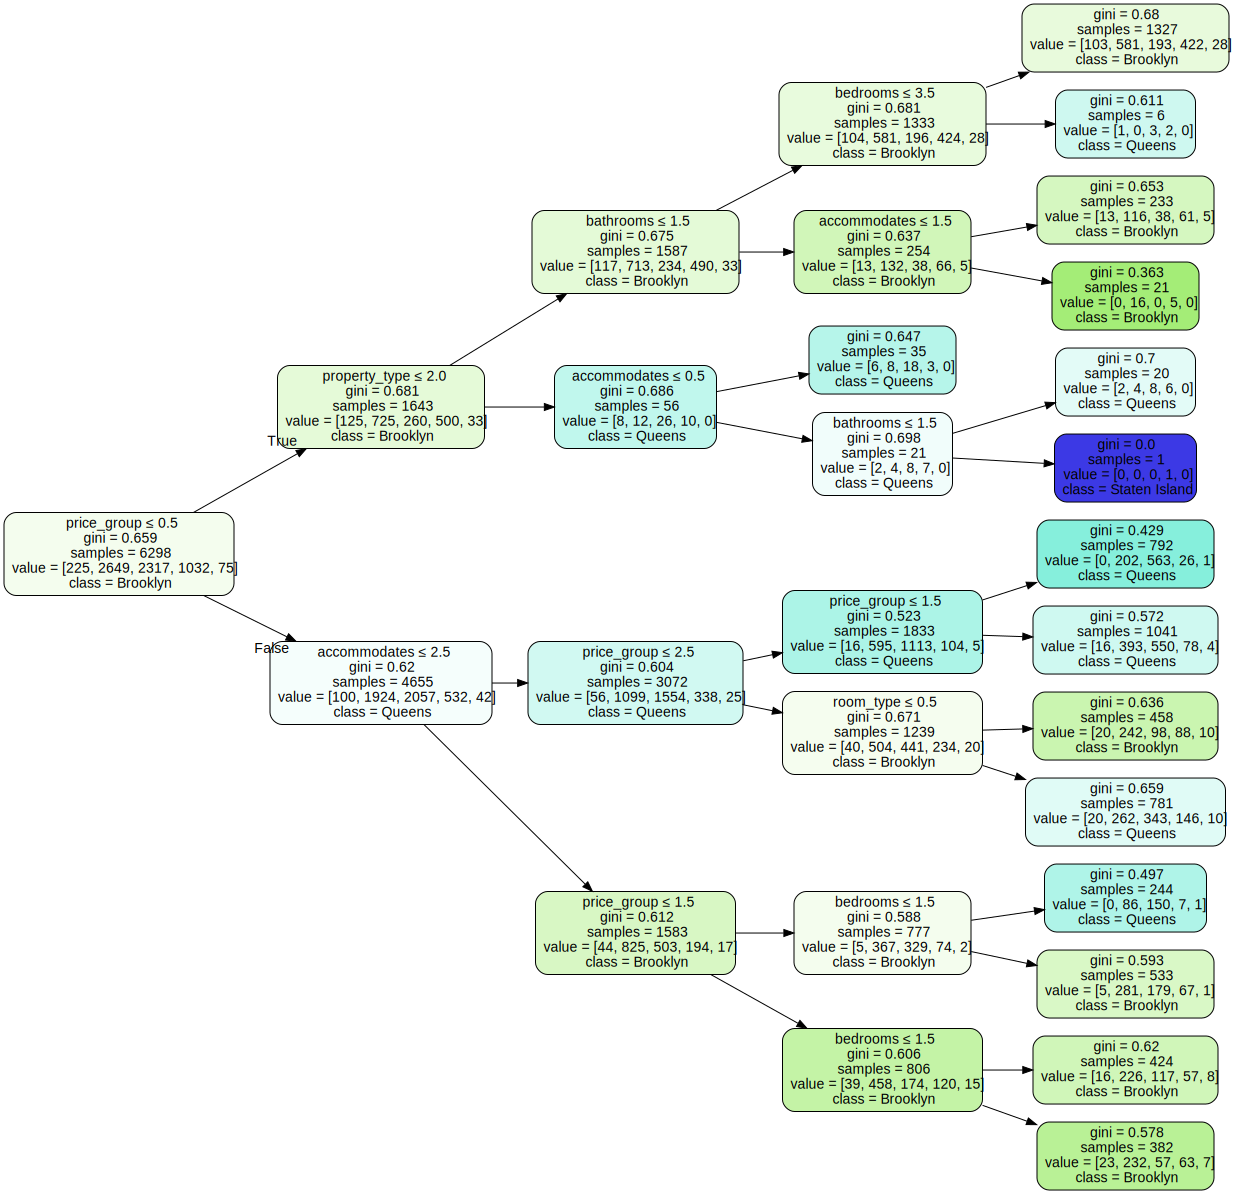

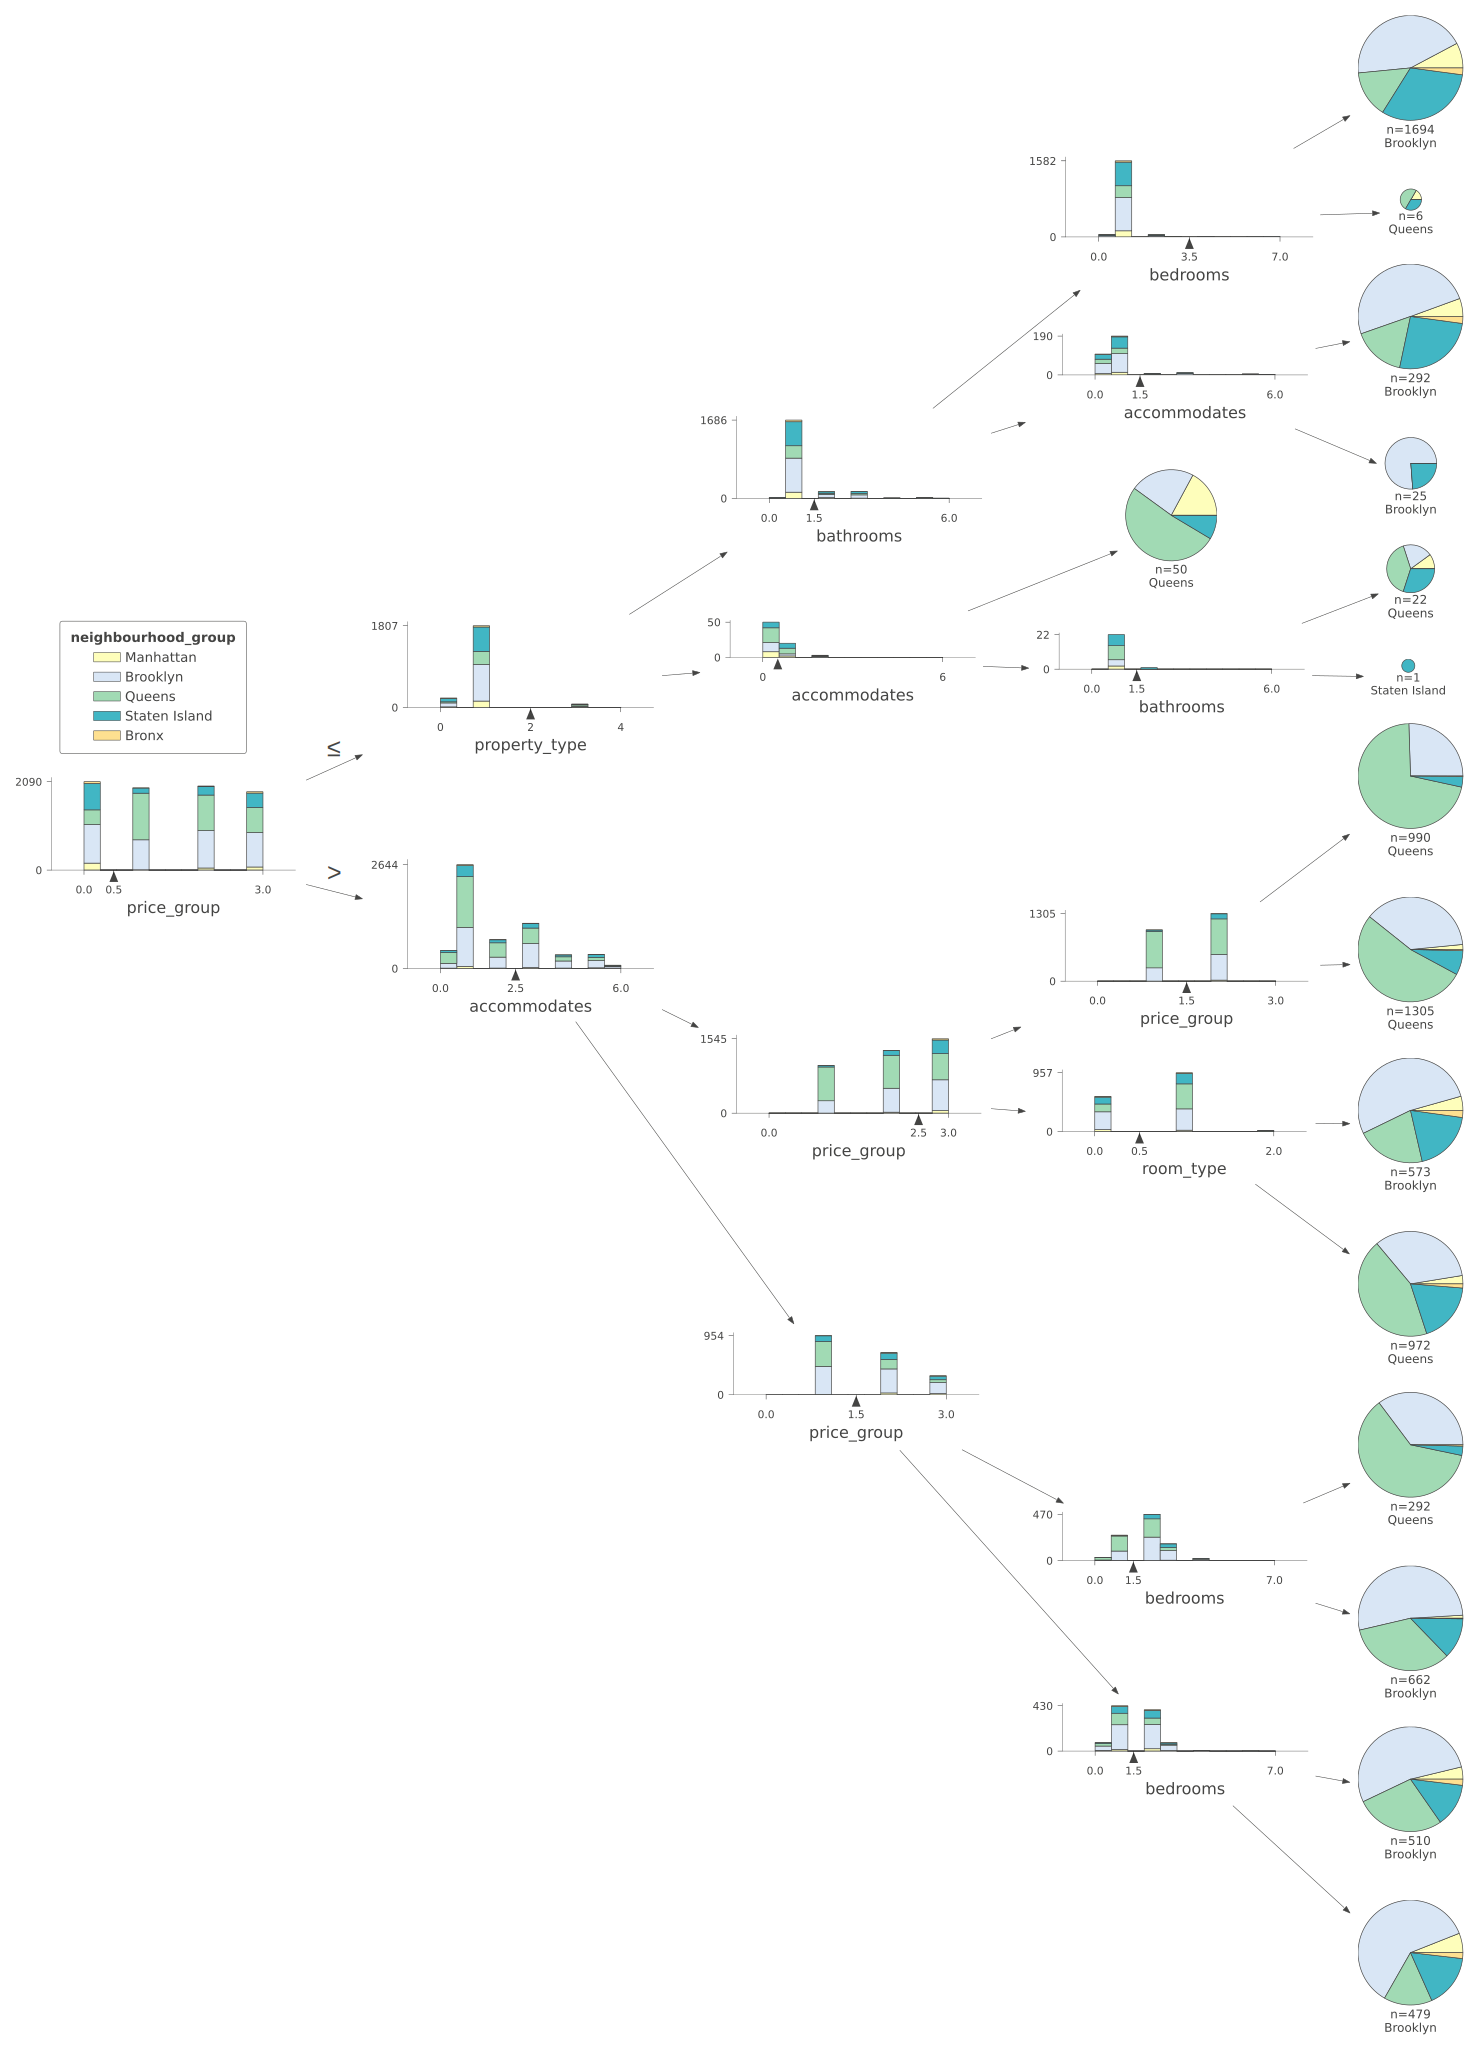

In [ ]:
#dtree = DecisionTreeClassifier(max_leaf_nodes=slider)
#dtree.fit(X, y)

# using dt_model5a as our highest accuracy DT

dot_data = export_graphviz(dt_model5a,
                           out_file=None, 
                           class_names=df[label].unique().tolist(),
                           feature_names=features,  
                           filled=True,
                           rounded=True,  
                           special_characters=True,
                           rotate=True)  

graph = graphviz.Source(dot_data)  
display(graph)

viz = dtreeviz.model(model=dt_model5a,
               X_train=X, 
               y_train=y,
               target_name=label,
               feature_names=np.array(features),
               class_names=df[label].unique().tolist())
#old: viz = dtreeviz(tree_model=dtree,
#                    x_data=X,
#                    y_data=y,
#                    target_name=label_name,
#                    feature_names=np.array(feature_names),
#                    class_names=class_names.tolist(),
#                    orientation ='LR',
#               scale=2.0)           
viz.view(orientation="LR", scale=2.0)

## The first split is based on PRICE_GROUP feature.

**2. How many leaves are in the optimal classifier/ML model?**

In [ ]:
dt_model5a.get_n_leaves()

15

**3. Produce a confusion_matrix and describe your ML model’s accuracy in terms of the number of true and false positives and negatives.** 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cf_model5a = confusion_matrix(y_test, y_pred5a)
cf_model5a

array([[  0,  57,   9,   0,   0],
       [  0, 405, 267,   0,   0],
       [  0, 182, 383,   0,   0],
       [  0, 199,  55,   0,   0],
       [  0,  14,   4,   0,   0]])

This model has many false values as the confusion matrix should look like and index matrix with numbers on the upper left to lower right angle, surrounded by zeros.

**4. Using scikit-learn’s classification_report method, generate the accuracy, precision, recall, and F1 score for your model and describe your ML model’s accuracy.** 


In [ ]:
print(classification_report(y_test, y_pred5a,target_names=df[label].unique()))

               precision    recall  f1-score   support

    Manhattan       0.00      0.00      0.00        66
     Brooklyn       0.47      0.60      0.53       672
       Queens       0.53      0.68      0.60       565
Staten Island       0.00      0.00      0.00       254
        Bronx       0.00      0.00      0.00        18

     accuracy                           0.50      1575
    macro avg       0.20      0.26      0.23      1575
 weighted avg       0.39      0.50      0.44      1575



# **Visualize the structure of your final ML model:**


**5. Plot your tree. [Hint: using scikit-learn’s tree.plot_tree**

In [ ]:
from sklearn import tree


In [ ]:
clf = dt_model5a

[Text(0.4732142857142857, 0.9, 'x[5] <= 0.5\ngini = 0.659\nsamples = 6298\nvalue = [225, 2649, 2317, 1032, 75]'),
 Text(0.23214285714285715, 0.7, 'x[1] <= 2.0\ngini = 0.681\nsamples = 1643\nvalue = [125, 725, 260, 500, 33]'),
 Text(0.14285714285714285, 0.5, 'x[4] <= 1.5\ngini = 0.675\nsamples = 1587\nvalue = [117, 713, 234, 490, 33]'),
 Text(0.07142857142857142, 0.3, 'x[3] <= 3.5\ngini = 0.681\nsamples = 1333\nvalue = [104, 581, 196, 424, 28]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.68\nsamples = 1327\nvalue = [103, 581, 193, 422, 28]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.611\nsamples = 6\nvalue = [1, 0, 3, 2, 0]'),
 Text(0.21428571428571427, 0.3, 'x[2] <= 1.5\ngini = 0.637\nsamples = 254\nvalue = [13, 132, 38, 66, 5]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.653\nsamples = 233\nvalue = [13, 116, 38, 61, 5]'),
 Text(0.25, 0.1, 'gini = 0.363\nsamples = 21\nvalue = [0, 16, 0, 5, 0]'),
 Text(0.32142857142857145, 0.5, 'x[2] <= 0.5\ngini = 0.686\nsamples = 56\nvalue = [8, 12, 

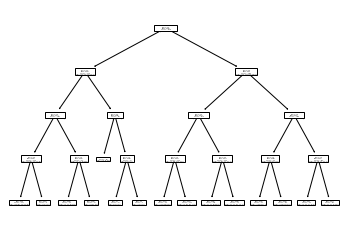

In [ ]:
tree.plot_tree(clf)

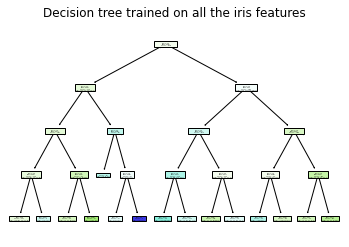

In [ ]:
plt.figure()
tree.plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

**6. Plot the decision surface of your tree using paired features. [See the following for help implementing:**
https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py]

# TAN WILL SOLVE

# **Decision tree path:** 

**7. Provide a description of the potential path along your tree that a given new data point might take and provide its final result. The idea being that we want to know what decisions would be made along the way for that data point to end up at a particular label.**

# DISCUSS WITH GROUP ON THURSDAY

# **ML model Accuracy**

Perform a comparison of our decision tree model vs. k-NN model: provide a comparison table of accuracy for your various DT ML models and your k-NN ML models. This will be a tool for comparison for you as a technician, but it will also serve as a communication tool to summarize to stakeholders what you tried, what worked best, and why.


# **Business Evaluation**


One of the key objectives of this course is to learn how to implement ML algorithms to tackle business problems and objectives. Please provide us with a complete scenario of how the results of your decision tree classifier might be used.

**Note:** you’ve previously considered some of these questions, the intent with reconsidering them is to iterate on our problem after obtaining results from our ML model:


**1. What might be the motivation for a decision tree classifier?**


The primary motivation for employing Decision Trees is to generate a training model capable of predicting the class or value of target variables by acquiring decision rules from trained data. 

Using Decision Trees (DT) to create decision rules for our dataset was a highly reasonable approach, especially because DT can handle categorical features and labels with no problem (neighbourhood group, room or property type in our case. So, in scenarios where the dataset could mainly be categorial because of the nature of the domain (retail companies, Airbnb, Real Estate, eCommerce, etc.), using the DT classifier might be beneficial.

Another significant advantage of implementing a DT Classifier is that this algorithm is straightforward to comprehend. Its structure is basically how humans make decisions, which makes it easier to visualize and interpret the decisions made by our model. Furthermore, this simplicity could help explain the model to different stakeholders. 

Lastly, other motivations why decision tree classifiers might be used
can be summarized as follows:

*   More flexible and able to handle a wide range of data types and structures
*   Can handle large datasets with high-dimensional feature spaces
*   It can be combined in ensembles to improve accuracy and reduce overfitting
*   Used for feature selection by ranking the importance of each feature based on how much it contributes to the decision tree
*   It can capture nonlinear relationships between features and target variables, making them useful for complex datasets with nonlinear patterns

All the advantages described above make decision tree classifiers a versatile, powerful tool and more accessible than other classification algorithms.

**2. What is the “action” that should be taken given the results of this prediction?**

In [ ]:
# Clinton

**3. Who is the best immediate person(s) to make use of the results of your prediction?**

In [ ]:
# Brett

**4. What is the potential payoff of this prediction for an organization? (e.g., costs or efficiency).**


In [ ]:
# RAM

**5. Do your ML models’ results change your problem? If so, how and why? If not, please explain.**

In [ ]:
# TAN